# Introduction
In this exercise, multiple plots will be shown using the stocks dataset of the last 5 years. This will be done for the following three companies: Amazon, Google and Facebook. There are chosen because they're three of the biggest corporatios in the US.

At first, each of the three companies will have a plot that shows the open, close and volume of stocks sold per day for the last five years. Then, multiple plots will be shown that shows the seasonality of the closing prices.

# Gather data

In [1]:
# Import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download the dataset
stocks = pd.read_csv('all_stocks_5yr.csv', parse_dates = ['date'])

# Query the database based on the selected companies
companies = ['GOOGL', 'AMZN', 'FB']
stocks = stocks.query("Name == {}".format(str(companies)))
stocks = stocks.reset_index(drop = True)
stocks.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


# Plot visualizations of open, close and stocks sold
In this chapter the open, close and stocks sold will be plotted for each company. The open and close prices will be shown that if the opening is greater than the closing, the plot will appear green. Otherwise it will appear red
After that, some findings will be drawn from the plots.

## Visualizations

In [16]:
# Create a function to create two different plots: fill between and line plot
# The fill between will be done for the open vs close stock prices
# The plot will be for the volume of stocks sold

def plot_stocks(axes, data, color_line, color_fill, 
                alpha, linewidth, title, size_title, size_label,
               xticks, size_xticks, yticks_label_size):
    # Sort the data by date
    data = data.sort_values('date')
    
    # Create x and y from given dataframe
    x = data['date']
    y_line = data['volume']
    y_fill_min = data['open']
    y_fill_max = data['close']
    
    # Create the plots
    plot1 = axes.scatter(x, y_line, color = color_line, linewidth = linewidth, label = "Stocks sold",
                        alpha = alpha)
    
    #Set title and labels 
    axes.set_title(title, fontsize = size_title)
    axes.set_xlabel("Time of the stock exchange", fontsize = size_label)
    axes.set_ylabel("Amount of stocks sold (x 10 million)", color = color_line, fontsize = size_label)
    axes.tick_params('y', colors=color_line, labelsize = yticks_label_size)
    
    axes.set_xticks(xticks)
    axes.set_xticklabels([x.strftime('%Y') for x in xticks], rotation = 45, fontsize = size_xticks)
    
    # Create a twin Axes that shares the x-axis
    ax2 = axes.twinx()
    
    # Create the fill between plots
    ax2.fill_between(x, y_fill_min, y_fill_max, where = y_fill_min >= y_fill_max,
                             color = 'red', label = "Stock prices on day of profit")
    ax2.fill_between(x, y_fill_min, y_fill_max, where = y_fill_min < y_fill_max,
                             color = 'green', label = "Stock prices on day of loss")
    
    
    #Set labels
    ax2.set_xlabel("Time of the stock exchange", fontsize = size_label)
    ax2.set_ylabel("Open and close prices of stocks", color = color_fill, fontsize = size_label)
    ax2.tick_params('y', colors=color_fill, labelsize = yticks_label_size)
    
    ax2.set_xticks(xticks)
    ax2.set_xticklabels([x.strftime('%Y-%m') for x in xticks], rotation = 45, fontsize = size_xticks)

    axes.legend(loc = "upper left", fontsize = "large")
    ax2.legend(fontsize = "medium")

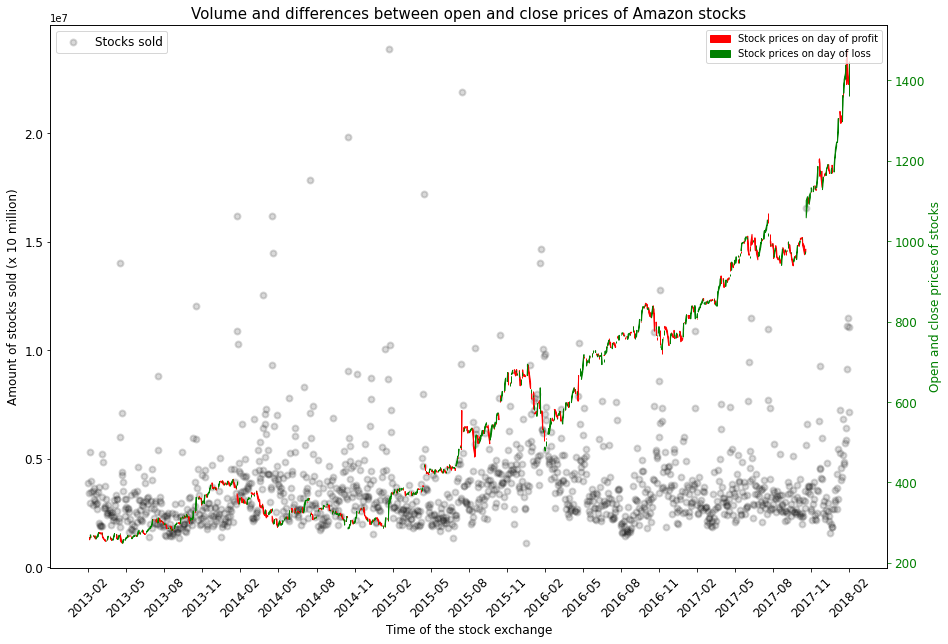

In [17]:
# Set up the parameters
# Data
amz = stocks[stocks['Name'] == 'AMZN']

# Colors and other plot specs
color_line = 'black'
color_fill = 'green'
alpha = 0.15
linewidth = 2
title_amz = "Volume and differences between open and close prices of Amazon stocks"

# Plot using the plot_stock function
fig, ax = plt.subplots(figsize = (15, 10))

# Sizes
size_title = 15
size_label = 12

# Xticks
xticks = pd.date_range(start = min(stocks.date), end = max(stocks.date), periods = 21)
xticks_size = 12
yticks_label_size = 12

# Plot for Amazon
plot_stocks(ax, amz, color_line, color_fill, 
            alpha, linewidth, title = title_amz, 
            size_title = size_title, size_label = size_label, 
            xticks = xticks, size_xticks = xticks_size, yticks_label_size =yticks_label_size)

plt.show(block = False)

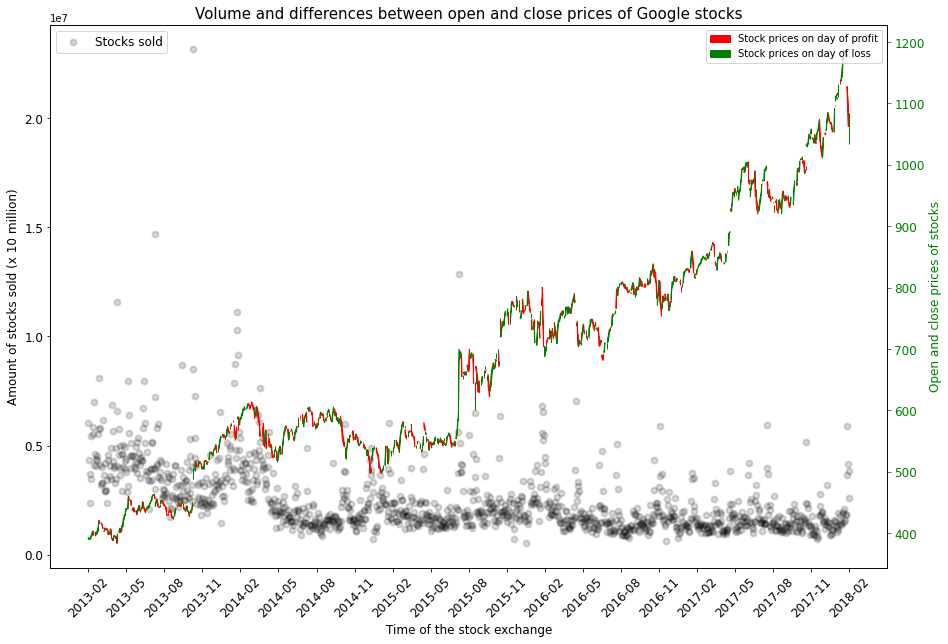

In [18]:
# Set up the parameters
goog = stocks[stocks['Name'] == 'GOOGL']

# Colors and other plot specs
color_line = 'black'
color_fill = 'green'
alpha = 0.15
linewidth = 2
title_goog = "Volume and differences between open and close prices of Google stocks"

# Sizes
size_title = 15
size_label = 12

# Xticks
xticks = pd.date_range(start = min(stocks.date), end = max(stocks.date), periods = 21)
xticks_size = 12
yticks_label_size = 12

# Plot using the plot_stock function
fig, ax = plt.subplots(figsize = (15, 10))

# Plot for Google
plot_stocks(ax, goog, color_line, color_fill, 
            alpha, linewidth, title = title_goog, 
            size_title = size_title, size_label = size_label, 
            xticks = xticks, size_xticks = xticks_size, yticks_label_size =yticks_label_size)

plt.show()

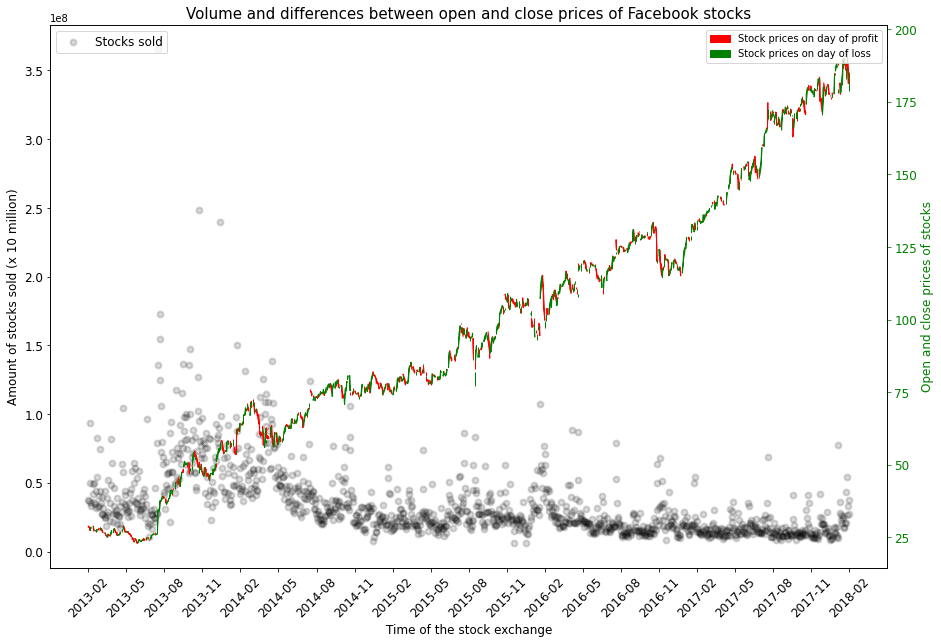

In [19]:
# Set up the parameters
fb = stocks[stocks['Name'] == 'FB']

# Colors and other plot specs
color_line = 'black'
color_fill = 'green'
alpha = 0.15
linewidth = 2
title_fb = "Volume and differences between open and close prices of Facebook stocks"

# Sizes
size_title = 15
size_label = 12

# Xticks
xticks = pd.date_range(start = min(stocks.date), end = max(stocks.date), periods = 21)
xticks_size = 12
yticks_label_size = 12

# Plot using the plot_stock function
fig, ax = plt.subplots(figsize = (15, 10))

# Plot for Facebook
plot_stocks(ax, fb, color_line, color_fill, 
            alpha, linewidth, title = title_fb, 
            size_title = size_title, size_label = size_label, 
            xticks = xticks, size_xticks = xticks_size, yticks_label_size =yticks_label_size)

plt.show()

## Findings
Based on the plots, we can conclude the following:
- Each company has had an overall steady progress of the overall stock price over the last few years.
- After the progress has been set, there're less outliers of the number of stocks sold. This goes to show that when the stock prices are high, customers are less likely to sell their stocks. This is largely based on the practice to buy stocks when the prices are low.
- When there's a (short) period of the stock prices going down, it's usually the case that the stock closing price is smaller than the opening price.

# Seasonality
In this chapter, the companies will be plotted to show the seasonality in the closing prices. This will be done for the following:
- Seasonality in weekdays
- Mass shootings in the US in 2015
- Holidays in America (4th of July, Halloween and Christmas/New Years eve)
- 2016 election

## Weekdays
In this paragraph, boxplots will be shown to show possible seasonality in the different weekdays of the stock closing prices. 

In [7]:
# Set up weekday column
data = [amz, fb, goog]

# Add the weekday column based on the day name attribute of the date column
for df in data:
    df['weekday'] = df.date.dt.day_name()

C:\Users\ardejong\AppData\Local\Temp/ipykernel_5064/4167603456.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df.date.dt.day_name()


In [8]:
# Function to create a boxplot from Seaborn
def boxplot(ax, x, y, data, title):
    order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
    sns.boxplot(x = x, y = y, data = data, order = order, ax = ax)
    ax.set_title(title)

### Visualization

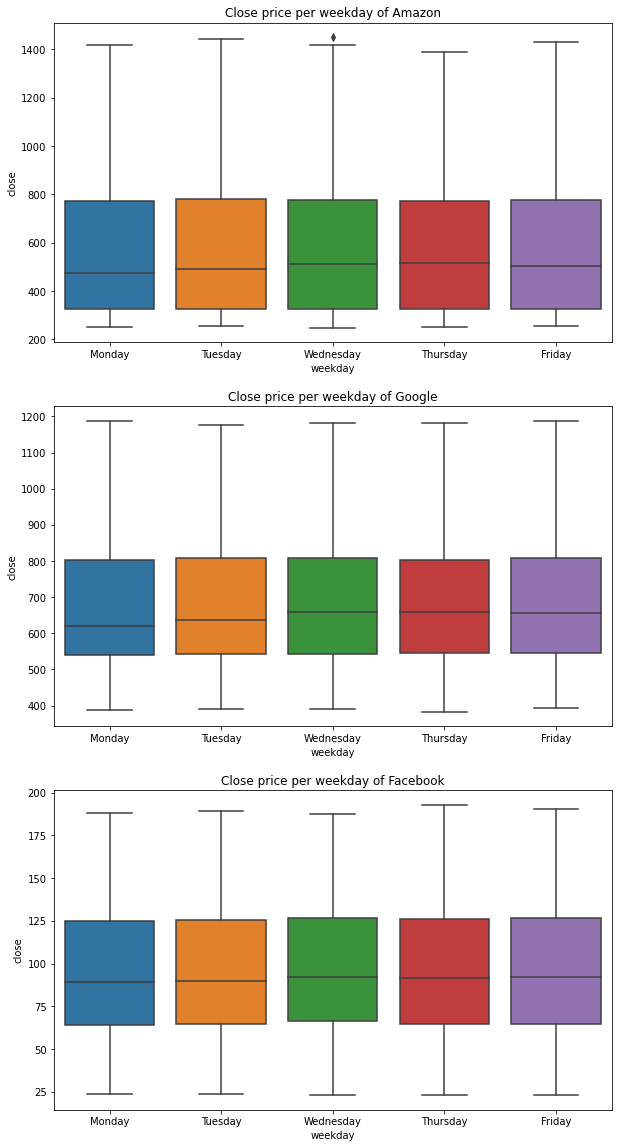

In [9]:
# Set up the parameters   
x = "weekday"
y = "close"
title_amz = "Close price per weekday of Amazon"
title_goog = "Close price per weekday of Google"
title_fb = "Close price per weekday of Facebook"

figsize = (10, 20)
    
# Plot the plots    
fig, ax = plt.subplots(figsize = figsize, nrows = 3)

boxplot(ax[0], x, y, amz, title_amz)
boxplot(ax[1], x, y, goog, title_goog)
boxplot(ax[2], x, y, fb, title_fb)
plt.show()

## Findings
Based on the boxplots, I can conclude that there's no seasonality at all in weekdays in general. There's only one outlier at Wednesday for Amazon, but that doesn't affect the distribution.

## Mass shootings in the USA in 2015
America has sadly to deal with a rising number of violent mass (school) shootings. In order to see if it affects the stock prices of the companies, we'll zoom in on 2015 and highlight the period around the most violent ones of that year:
- Waco, Texas shooting: 17 May 2015
- Lafayette, Louisiana: 23 July 2015
- Roseburg, Oregon: 1 October 2015
- San Bernardino, California: 2 December 2015

### Visualizations

In [10]:
# Function to create plot with highlights 
def periodplot(ax, data, title, xlabel, 
             ylabel, linewidth):
    x = data['date']
    y = data['close']
    ax.plot(x, y, label = "Stock closing price", linewidth = linewidth)
    ax.set_title(title)
    ax.set(xlabel = xlabel, ylabel = ylabel)
    
    # Set up the period hightlight around the mass shootings
    ax.axvspan(xmin = mass_shooting_dates[0][0], xmax = mass_shooting_dates[0][1], color = 'red', alpha = 0.4,
              label = "Mass shooting")
    ax.axvspan(xmin = mass_shooting_dates[1][0], xmax = mass_shooting_dates[1][1], color = 'red', alpha = 0.4)
    ax.axvspan(xmin = mass_shooting_dates[2][0], xmax = mass_shooting_dates[2][1], color = 'red', alpha = 0.4)
    ax.axvspan(xmin = mass_shooting_dates[3][0], xmax = mass_shooting_dates[3][1], color = 'red', alpha = 0.4)
    
    ax.legend()

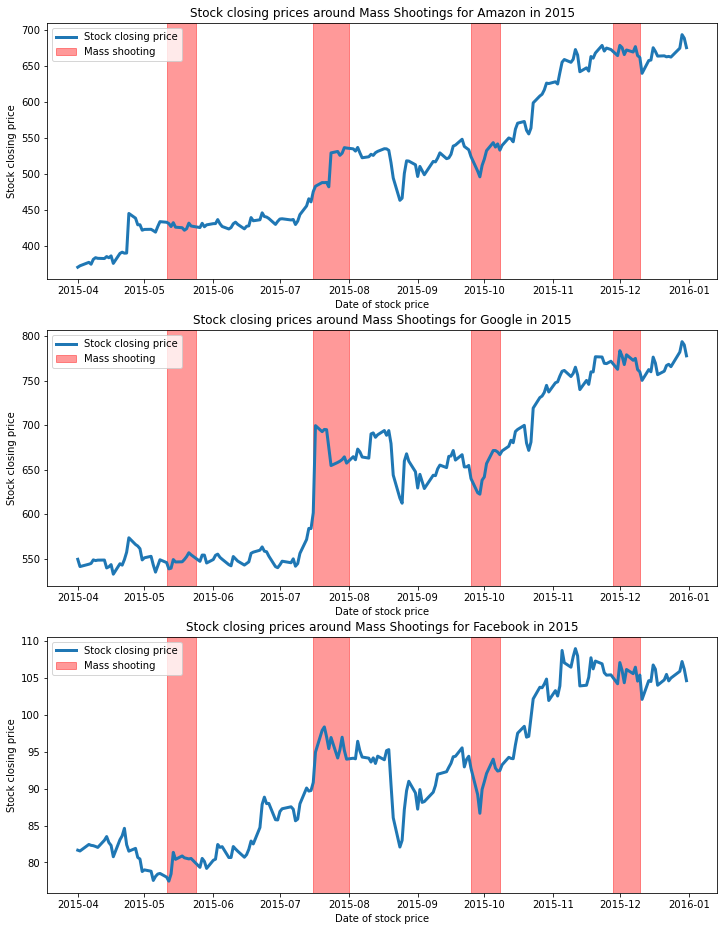

In [11]:
# Set up dates
mass_shooting_dates = [["2015-05-11", "2015-05-24"], ["2015-07-16", "2015-08-01"], 
                       ["2015-09-25", "2015-10-08"], ["2015-11-28", "2015-12-10"]]

dates = ["2015-04-01", "2015-12-31"]

# Data
amz_shootings = (amz.loc[(amz['date'] >= dates[0]) & (amz['date'] <= dates[1])])\
                .sort_values('date').reset_index(drop = True)

goog_shootings = (goog.loc[(goog['date'] >= dates[0]) & (goog['date'] <= dates[1])])\
            .sort_values('date').reset_index(drop = True)

fb_shootings = (fb.loc[(fb['date'] >= dates[0]) & (fb['date'] <= dates[1])])\
            .sort_values('date').reset_index(drop = True)

# Linewidth and other sizes
linewidth = 3
figsize = (12, 16)

# Titles and labels
title_amz = "Stock closing prices around Mass Shootings for Amazon in 2015"
title_goog = "Stock closing prices around Mass Shootings for Google in 2015"
title_fb = "Stock closing prices around Mass Shootings for Facebook in 2015"
xlabel = "Date of stock price"
ylabel = "Stock closing price"

# Plot the plots
fig, ax = plt.subplots(figsize = figsize, nrows = 3)

periodplot(ax[0], amz_shootings, title_amz, xlabel, ylabel, linewidth)
periodplot(ax[1], goog_shootings, title_goog, xlabel, ylabel, linewidth)
periodplot(ax[2], fb_shootings, title_fb, xlabel, ylabel, linewidth)



plt.show()

### Findings
Based on the flots, we can see that the seasonality took place around the mass shootings. E.g. before the second shooting, the stock prices of Google were skyrocketing, while after that, it stopped and fell a bit after that. This does not go for all shootings. The first one didn't have any seasonality.

## Holidays
In this chapter, the stock closing prices will be plotted. This will be done for the following holidays.
- Christmas/New Years Eve. They will be combined there're shortly after each other.
- 4th of July: America's Independence Day
- Halloween

### Visualizations

In [12]:
def holidayplot(ax, data, title, xlabel, 
             ylabel, linewidth):
    x = data['date']
    y = data['close']
    ax.plot(x, y, label = "Stock closing price", linewidth = linewidth)
    ax.set_title(title)
    ax.set(xlabel = xlabel, ylabel = ylabel)
    
    # Set up the vspan around the holidays
    ax.axvspan(xmin = july_days[0], xmax = july_days[1], color = 'red', alpha = 0.4,
              label = "4th of July period")
    ax.axvspan(xmin = chis_year_days[0], xmax = chis_year_days[1], color = 'green', alpha = 0.4,
              label = "Chistmas/New Years eve period")
    ax.axvspan(xmin = hall_days[0], xmax = hall_days[1], color = 'orange', alpha = 0.4,
              label = "Halloween period")
    ax.legend(loc='lower left', bbox_to_anchor=(1, 0.5))

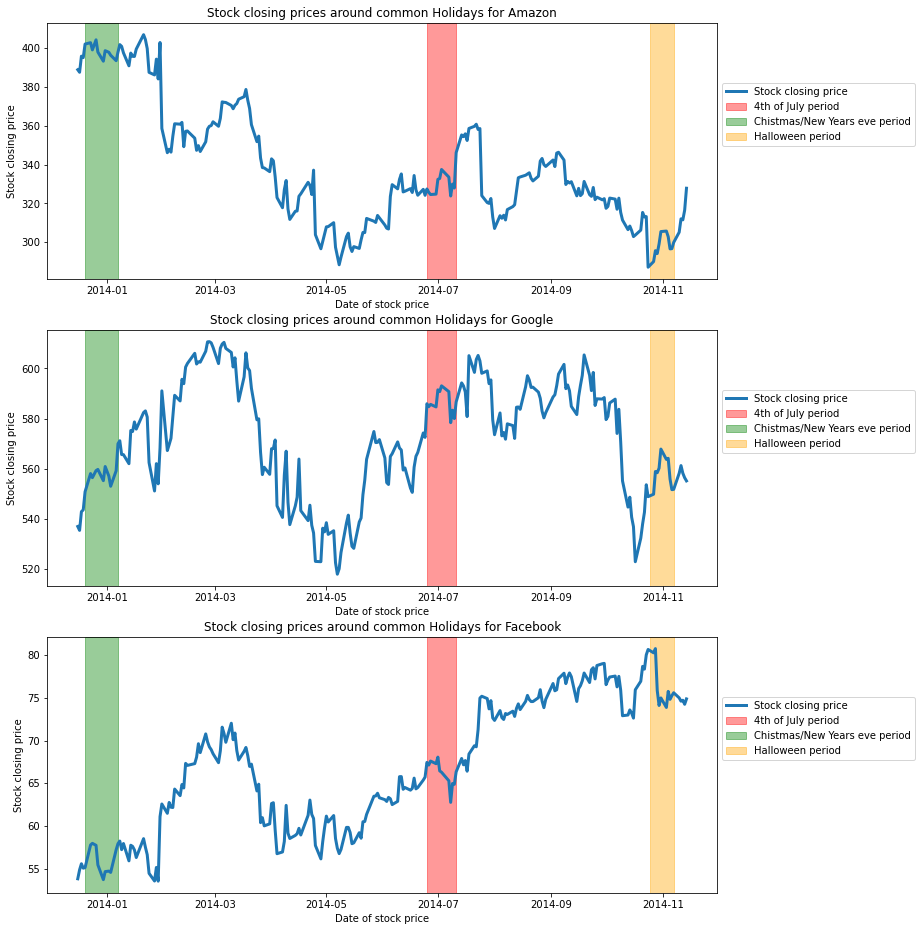

In [13]:
# Set dates
valentine_days = ["2014-02-07", "2014-02-21"]
chis_year_days = ["2013-12-20", "2014-01-07"]
hall_days = ["2014-10-25", "2014-11-07"]
july_days = ["2014-06-25", "2014-07-11"]
dates_holidays = ["2013-12-14", "2014-11-14"]

# Set up parameters
# Datasets 
amz_holidays = (amz.loc[(amz['date'] >= dates_holidays[0]) & (amz['date'] <= dates_holidays[1])])\
                .sort_values('date').reset_index(drop = True)

goog_holidays = (goog.loc[(goog['date'] >= dates_holidays[0]) & (goog['date'] <= dates_holidays[1])])\
            .sort_values('date').reset_index(drop = True)

fb_holidays = (fb.loc[(fb['date'] >= dates_holidays[0]) & (fb['date'] <= dates_holidays[1])])\
            .sort_values('date').reset_index(drop = True)

# Titles and labels
title_amz = "Stock closing prices around common Holidays for Amazon"
title_goog = "Stock closing prices around common Holidays for Google"
title_fb = "Stock closing prices around common Holidays for Facebook"
xlabel = "Date of stock price"
ylabel = "Stock closing price"

# Linewidth and other sizes
linewidth = 3
figsize = (12, 16)

# Plot the plots
fig, ax = plt.subplots(figsize = figsize, nrows = 3)

holidayplot(ax[0], amz_holidays, title_amz, xlabel, ylabel, linewidth)
holidayplot(ax[1], goog_holidays, title_goog, xlabel, ylabel, linewidth)
holidayplot(ax[2], fb_holidays, title_fb, xlabel, ylabel, linewidth)

plt.show()

### Findings
Based on the plots, we can see that around each Holiday, some seasonality took place. It's quite noticable that each companies stock price went up after the period of seasonality.

## Presedential election of 2016
In this chapter, we'll draw a plot that shows the seasonality after the presedential election of 2016, when Donald Trump surprisingly won.

### Visualizations

In [14]:
# Create the function to draw the plot
def lineplot(ax, data, title, xlabel, 
             ylabel, marker, xy_tit, xy_text, linewidth):
    x = data['date']
    y = data['close']
    ax.plot(x, y, marker = marker, markersize = 15, label = "Stock closing price", linewidth = linewidth)
    ax.set_title(title)
    ax.set(xlabel = xlabel, ylabel = ylabel)
    ax.annotate(xy_tit, xy = (pd.Timestamp('2016-11-08'), y[5]), xytext = xy_text, 
                arrowprops = dict(arrowstyle = '->', color = 'red', lw = 3))
    ax.legend()

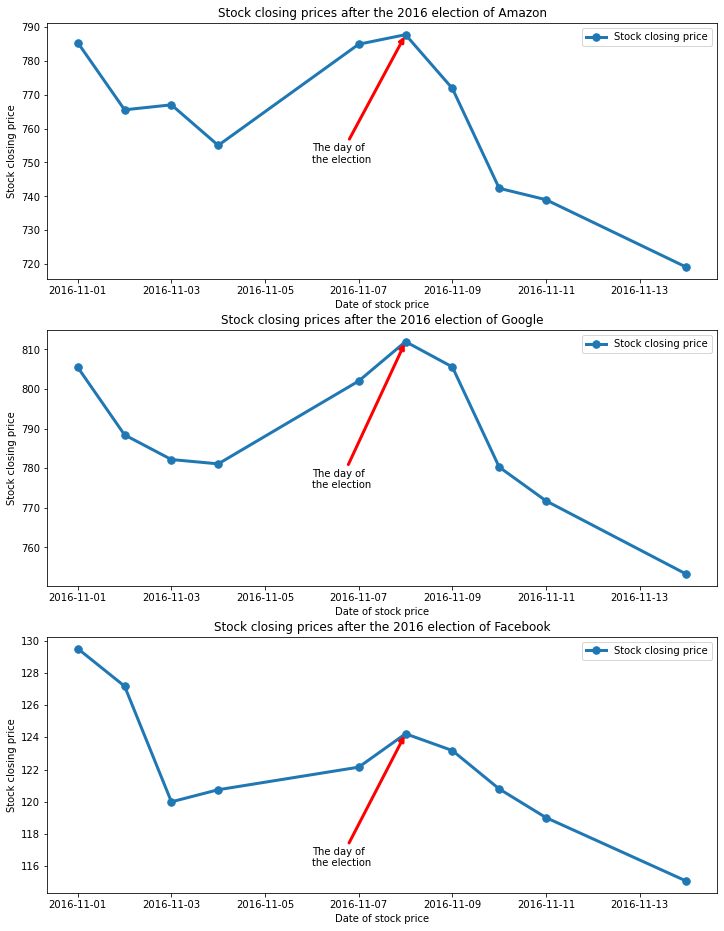

In [15]:
# Set up the parameters
dates = ['2016-11-01', '2016-11-14']
amz_2016 = (amz.loc[(amz['date'] >= dates[0]) & (amz['date'] <= dates[1])]).sort_values('date').reset_index(drop = True)
goog_2016 = (goog.loc[(goog['date'] >= dates[0]) & (goog['date'] <= dates[1])]).sort_values('date').reset_index(drop = True)
fb_2016 = (fb.loc[(fb['date'] >= dates[0]) & (fb['date'] <= dates[1])]).sort_values('date').reset_index(drop = True)

# Titles and labels
title_amz = "Stock closing prices after the 2016 election of Amazon"
title_goog = "Stock closing prices after the 2016 election of Google"
title_fb = "Stock closing prices after the 2016 election of Facebook"
xlabel = "Date of stock price"
ylabel = "Stock closing price"
marker = "."

linewidth = 3

# Annotations
xy_txt = "The day of \nthe election"
xytext_amz = (pd.Timestamp('2016-11-06'), 750)
xytext_goog = (pd.Timestamp('2016-11-06'), 775)
xytext_fb = (pd.Timestamp('2016-11-06'), 116)

# Plot the plots
fig, ax = plt.subplots(figsize = (12, 16), nrows = 3)

lineplot(ax[0], amz_2016, title_amz, xlabel, ylabel, marker, xy_txt, xytext_amz, linewidth)
lineplot(ax[1], goog_2016, title_goog, xlabel, ylabel, marker, xy_txt, xytext_goog, linewidth)
lineplot(ax[2], fb_2016, title_fb, xlabel, ylabel, marker, xy_txt, xytext_fb, linewidth)

plt.show()

### Findings
Based on the plots, we can see that each stock closing price went down after the election. This goes to show that a surprising result of the election can lead to a drop in the stock prices.